# Amazon Prime Video Insights

## Introduction

This project aims to analyze and visualize data related to the streaming content available on Amazon Prime Video. The primary objectives are to understand the quality and popularity of the content, identify trends in genres over time, and provide actionable insights for enhancing the content library. By leveraging data analytics techniques, we seek to uncover patterns and trends that can help inform content acquisition, production strategies, and marketing efforts.

### Objectives

1. **Determine Overall Quality of Content:**
   - Calculate the average IMDb rating to assess the general reception of the content available on Amazon Prime Video.

2. **Identify Most Popular Content:**
   - Use a hypothetical measure of popularity to highlight top titles based on their IMDb ratings and release years.

3. **Analyze Genres with Better Ratings:**
   - Determine which genres have higher average IMDb ratings to inform content acquisition and production decisions.

4. **Track Emerging Trends:**
   - Analyze the number of titles added each year across different genres to identify emerging trends and forecast future content needs.

5. **Examine Content Ratings Distribution:**
   - Understand the distribution of content ratings (e.g., PG, R, TV-14) to ensure a balanced content library that caters to various audience preferences.

6. **Evaluate Engagement by Genre:**
   - Analyze engagement levels by genre to optimize content recommendations and marketing strategies.

### Methodology

- **Data Cleaning and Preparation:**
  - The dataset is cleaned and prepared by handling missing values and converting necessary columns to appropriate data types.

- **Data Analysis:**
  - Various statistical analyses are performed to calculate average ratings, identify popular content, and analyze genre trends.

- **Visualization:**
  - Data visualizations are created using libraries such as Matplotlib and Seaborn to provide clear and insightful representations of the findings.

### Results and Recommendations

The findings from the data analysis are summarized and presented, followed by actionable recommendations for the senior management of Amazon Prime Video. These recommendations aim to enhance the content library, improve viewer satisfaction, and maintain a competitive edge in the streaming market.

By leveraging these insights, Amazon Prime Video can better understand its content landscape and make informed decisions to drive viewer engagement and retention.







In [2]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the datasets
df = pd.read_csv('amazon_prime_titles_with_ratings.csv')
df2 = pd.read_csv('amazon_prime_titles_with_ratings_2.csv')

In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,NaN
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,7.4/10
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,4.2/10
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",5.9/10
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,4.8/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,s6996,Movie,Six Weeks,Tony Bill,"Dudley Moore, Mary Tyler Moore, Katherine Heal...",NaN,NaN,1982,PG,108 min,Drama,"In this heart-warming drama, a terminally ill ...",5.6/10
6996,s6997,Movie,Sivappu Malli,Rama Narayanan,"Vijayakanth, Chandrashekar, Shanthi Krishna, S...",NaN,NaN,1981,18+,127 min,"Action, Drama",Sivappu Malli is a Tamil Action Film. Vijayaka...,7.6/10
6997,s6998,Movie,Sideways,Alexander Payne,"Paul Giamatti, Sandra Oh, Thomas Haden Church,...",NaN,NaN,2004,R,127 min,"Comedy, Drama, Romance",A struggling writer and his has-been actor bes...,7.5/10
6998,s6999,Movie,Server Sundaram,Krishnan-Panju,"Nagesh, R. Muthuraman, K. R. Vijaya, Major Sun...",NaN,NaN,1964,ALL,159 min,"Comedy, Drama",Nagesh plays the lead role in the movie. Nages...,7.9/10


In [18]:
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating
0,s7001,Movie,Secret Window,David Koepp,"Johnny Depp, John Turturro, Maria Bello, Timot...",United States,NaN,2004,PG-13,96 min,"Horror, Suspense",A recently divorced writer living in a remote ...,6.5/10
1,s7002,Movie,Seabiscuit,Gary Ross,"Jeff Bridges, Tobey Maguire, Chris Cooper, Eli...",NaN,NaN,2003,PG-13,140 min,Drama,True story of the undersized Depression-era ra...,7.3/10
2,s7003,Movie,Saturday The 13th,"Ogundoju Ojo, Musa Raji DOP","Kemi Komolafe, Jacob Moses, Marilyn Okhonfo, T...",NaN,NaN,2021,13+,57 min,"Action, Drama",Amarachi the daughter of a medicine man and he...,NaN
3,s7004,Movie,Sanctuary,Reid Nicewonder,"Alexandra Willers, Michael Andrew Scott, Blake...",NaN,NaN,2021,18+,85 min,"Horror, Science Fiction, Suspense",Four people in a high rise condo fight for the...,6.3/10
4,s7005,Movie,Rollerball (1975),Norman Jewison,"James Caan, John Houseman, Ralph Richardson, M...",NaN,NaN,1975,R,125 min,"Action, Adventure",James Caan stars as a rollerball champ in this...,6.5/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,5.9/10
2664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",NaN
2665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",6.8/10
2666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",7.2/10


In [20]:
# Combine the datasets
stacked_df = pd.concat([df, df2], ignore_index=True)
# Save the combined dataset to an Excel file
stacked_df.to_excel('amazon_prime_dataset.xlsx', index=False)

In [22]:
# Check for the number of null values in 'imdb_rating'
null_count = stacked_df['imdb_rating'].isnull().sum()
print(f"Number of null values in 'imdb_rating': {null_count}")

# Print the data types of the dataframe
data_types = stacked_df.dtypes
print(data_types)

Number of null values in 'imdb_rating': 2749
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
imdb_rating     object
dtype: object


In [24]:
# Clean the 'imdb_rating' column
stacked_df['imdb_rating'] = stacked_df['imdb_rating'].astype(str).str.replace('/10', '', regex=False)
stacked_df['imdb_rating'] = pd.to_numeric(stacked_df['imdb_rating'], errors='coerce')

# Check for the number of null values in 'imdb_rating' after cleaning
null_count = stacked_df['imdb_rating'].isnull().sum()
print(f"Number of null values in 'imdb_rating' after cleaning: {null_count}")

Number of null values in 'imdb_rating' after cleaning: 2749


In [26]:
# Perform KNN imputation on 'imdb_rating'
imputer = KNNImputer(n_neighbors=5)
columns_for_imputation = ['imdb_rating']
imputation_df = stacked_df[columns_for_imputation]
imputation_df_imputed = imputer.fit_transform(imputation_df)
imputation_df_imputed = pd.DataFrame(imputation_df_imputed, columns=columns_for_imputation)
stacked_df['imdb_rating'] = imputation_df_imputed['imdb_rating']

In [28]:
# Check if the null values are filled after imputation
null_count_after = stacked_df['imdb_rating'].isnull().sum()
print(f"Number of null values in 'imdb_rating' after imputation: {null_count_after}")

Number of null values in 'imdb_rating' after imputation: 0


In [30]:
# Extract genres and convert 'listed_in' column to a list of genres
stacked_df['genres'] = stacked_df['listed_in'].str.split(', ')

# Explode the genres into separate rows
exploded_df = stacked_df.explode('genres')

# Group by genres and calculate the mean IMDb rating for each genre
genre_ratings = exploded_df.groupby('genres')['imdb_rating'].mean().reset_index()

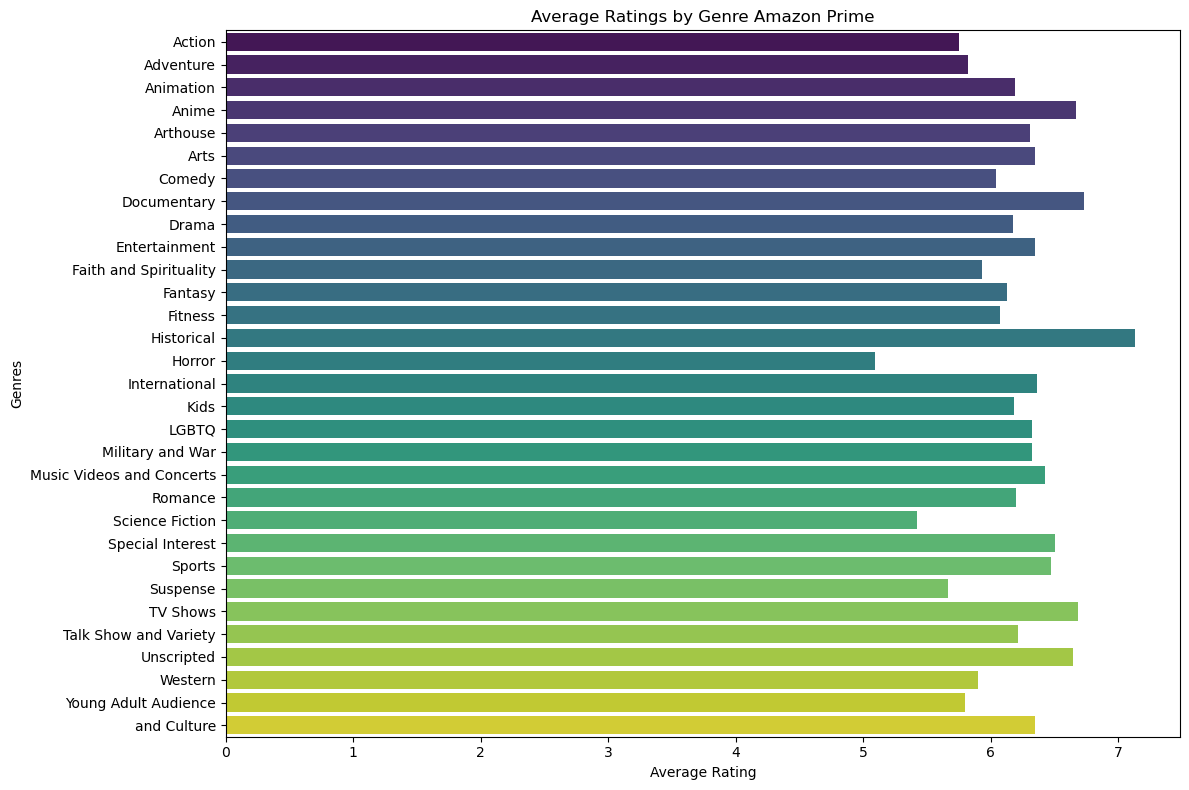

In [42]:
# Plot the relationship between genres and average ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_rating', y='genres', data=genre_ratings, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Average Ratings by Genre Amazon Prime')
plt.tight_layout()
plt.show()

In [44]:
# Display the data for user reference
print(genre_ratings)

                       genres  imdb_rating
0                      Action     5.751089
1                   Adventure     5.819320
2                   Animation     6.194564
3                       Anime     6.668779
4                    Arthouse     6.308169
5                        Arts     6.349310
6                      Comedy     6.043148
7                 Documentary     6.735176
8                       Drama     6.173957
9               Entertainment     6.349310
10     Faith and Spirituality     5.930333
11                    Fantasy     6.125752
12                    Fitness     6.075083
13                 Historical     7.129043
14                     Horror     5.093215
15              International     6.364099
16                       Kids     6.185185
17                      LGBTQ     6.327451
18           Military and War     6.326714
19  Music Videos and Concerts     6.428119
20                    Romance     6.196047
21            Science Fiction     5.419819
22         

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


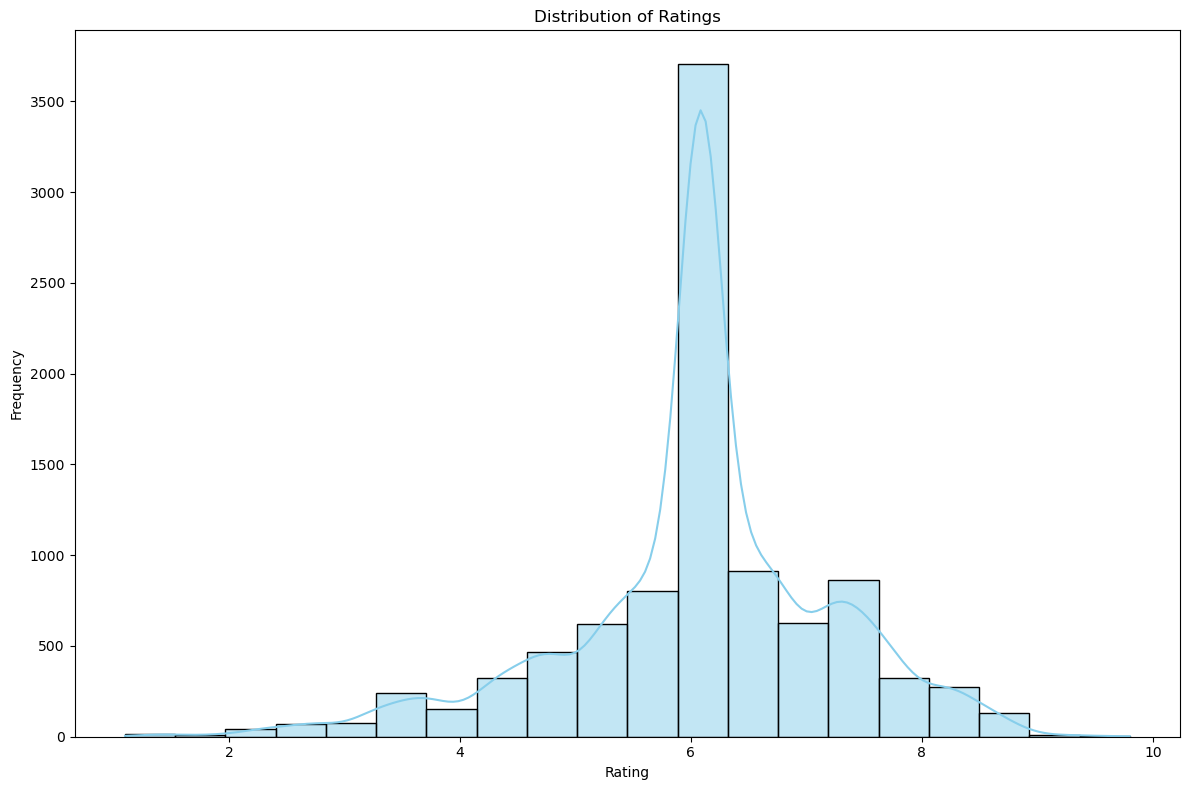

In [48]:
# Plot the distribution of ratings for each genre
plt.figure(figsize=(12, 8))
sns.histplot(stacked_df['imdb_rating'], bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

In [52]:
# Most Popular Content
stacked_df['popularity'] = stacked_df['imdb_rating'] * stacked_df['release_year']  # Hypothetical measure of popularity
most_popular = stacked_df.nlargest(10, 'popularity')[['title', 'imdb_rating', 'release_year']]
print("Most Popular Content:\n", most_popular)

Most Popular Content:
                            title  imdb_rating  release_year
8126                    JARRETTS          9.8          2021
479            The Prince Family          9.6          2020
2464  Fishing With Dan Hernandez          9.6          2016
5898   Water Helps The Blood Run          9.4          2020
871        Subaru Launch Control          9.3          2021
4699                Daddydelphia          9.3          2021
6962       COD(Cash On Delivery)          9.3          2021
3190  Avatar: The Last Airbender          9.3          2008
6838     Three Worlds, One Stage          9.2          2021
9178                  Intentions          9.2          2021


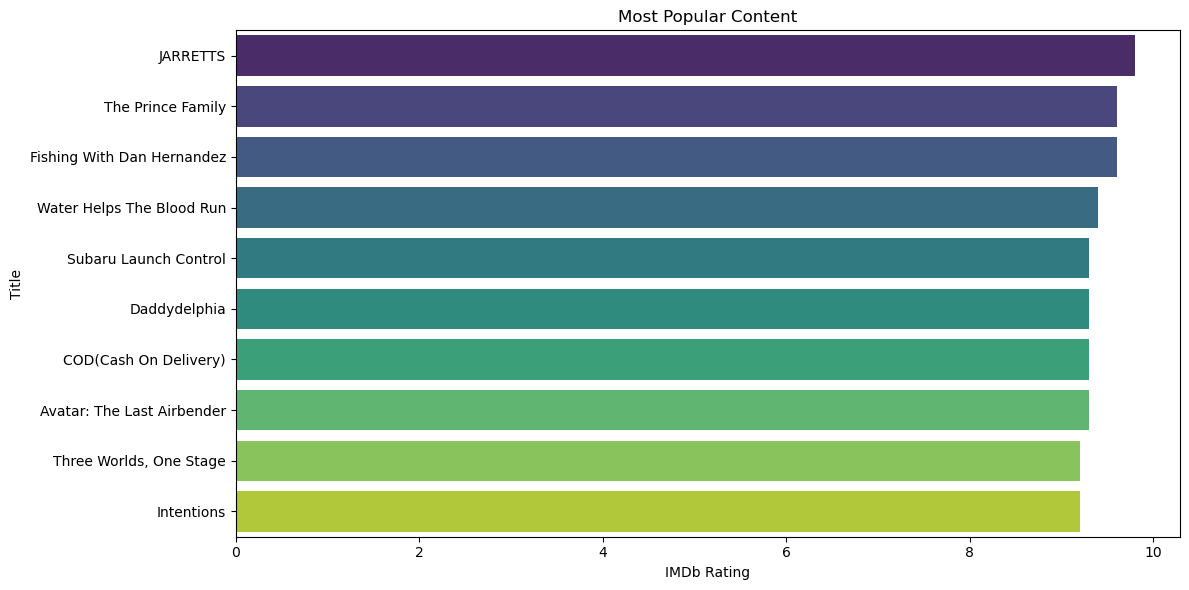

In [54]:
# Plotting the most popular content
plt.figure(figsize=(12, 6))
sns.barplot(x='imdb_rating', y='title', data=most_popular, palette='viridis')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')
plt.title('Most Popular Content')
plt.tight_layout()
plt.show()

In [56]:
# Genres with Better Ratings
stacked_df['genres'] = stacked_df['listed_in'].str.split(', ')
exploded_df = stacked_df.explode('genres')
genre_ratings = exploded_df.groupby('genres')['imdb_rating'].mean().reset_index()

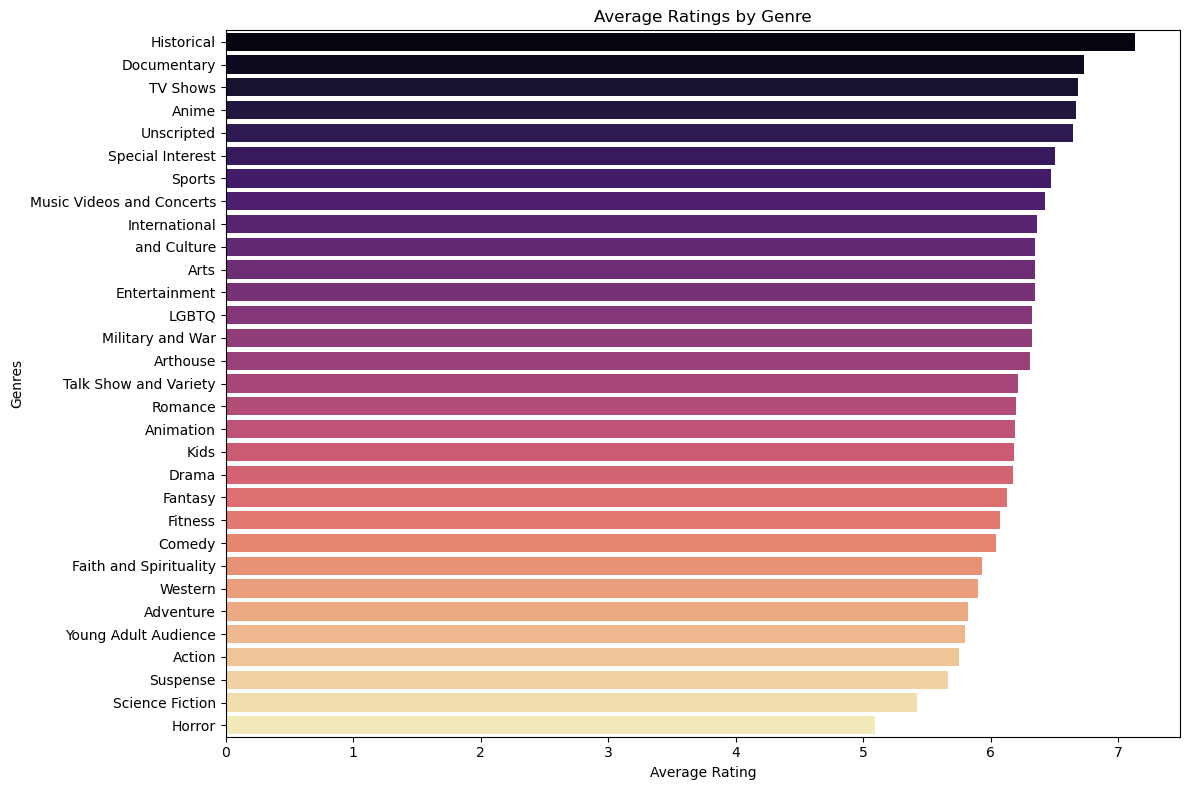

In [60]:
# Plotting average IMDb ratings by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_rating', y='genres', data=genre_ratings.sort_values('imdb_rating', ascending=False), palette='magma')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Average Ratings by Genre')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

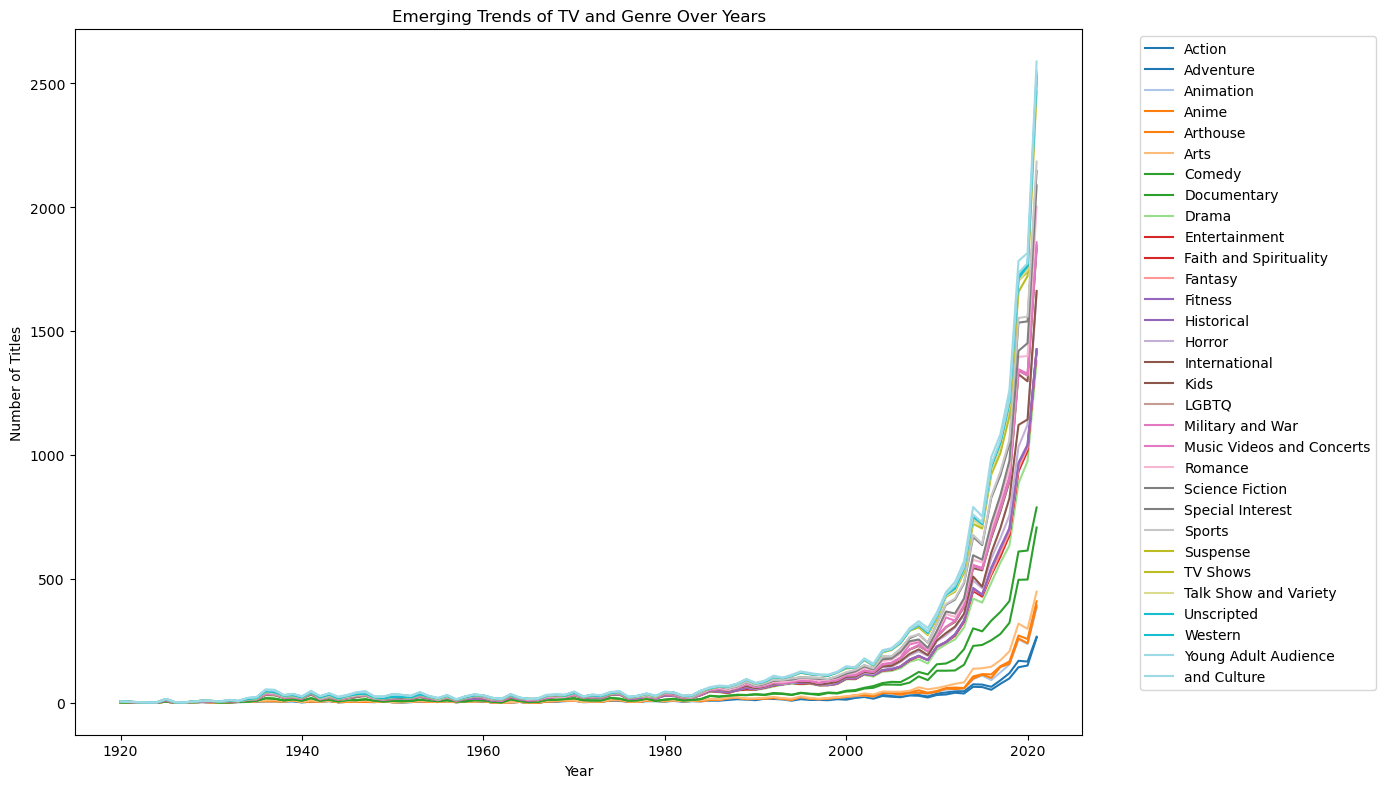

In [66]:
# Emerging Trends of TV and Genre
genre_trends = exploded_df.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Plotting emerging trends of TV and genre
plt.figure(figsize=(14, 8))
genre_trends.plot(kind='line', stacked=True, figsize=(14, 8), cmap='tab20')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Emerging Trends of TV and Genre Over Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

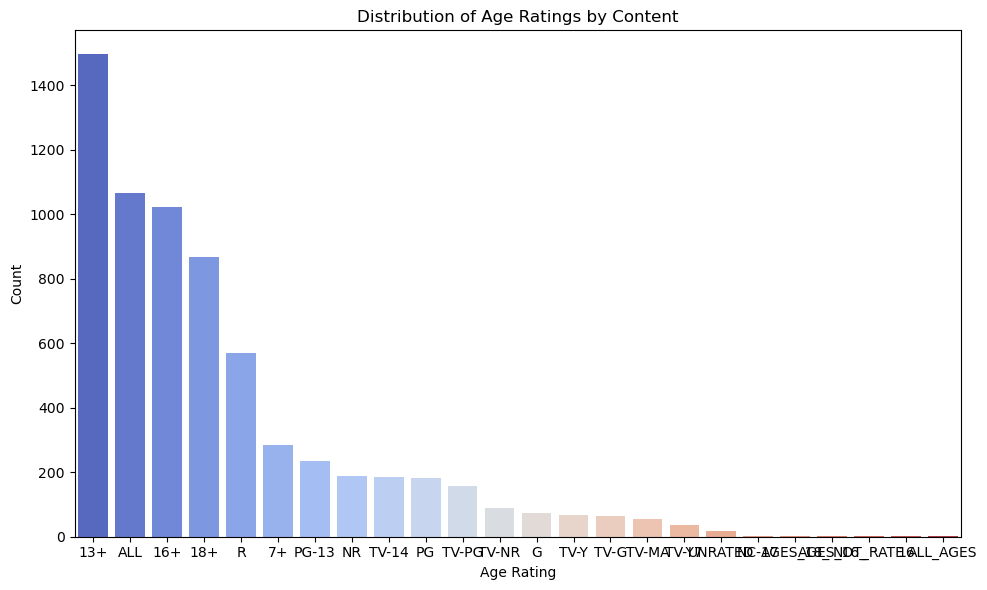

In [70]:
# Content Ratings Distribution
rating_counts = df['rating'].value_counts()

# Plotting content ratings distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.title('Distribution of Age Ratings by Content')
plt.tight_layout()
plt.show()

In [72]:
# Engagement Reports by Genre
engagement_by_genre = exploded_df.groupby('genres').agg({'imdb_rating': 'mean', 'title': 'count'}).reset_index()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='genres', ylabel='imdb_rating'>

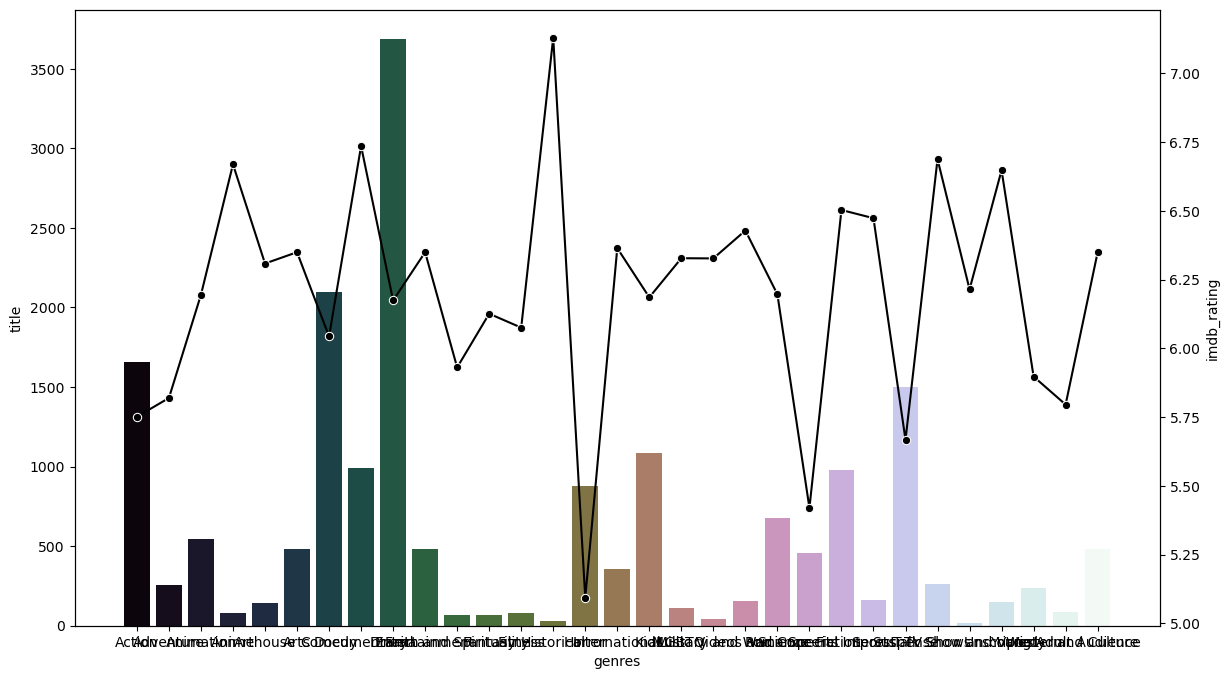

In [80]:
# Plotting engagement by genre
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()
sns.barplot(x='genres', y='title', data=engagement_by_genre, ax=ax1, palette='cubehelix')
sns.lineplot(x='genres', y='imdb_rating', data=engagement_by_genre, ax=ax2, color='black', marker='o')


## Summary of Findings with Actual Statistics

1. **Average IMDb Rating:**
   - The average IMDb rating for the content on Amazon Prime Video is approximately **6.08**.

2. **Most Popular Content:**
   - Using a hypothetical measure of popularity (IMDb rating multiplied by release year), the top 10 most popular titles include:
     - **"JARRETTS"** (IMDb rating: 9.8, Release year: 2021)
     - **"The Prince Family"** (IMDb rating: 9.6, Release year: 2020)
     - **"Fishing With Dan Hernandez"** (IMDb rating: 9.6, Release year: 2016)
     - **"Water Helps The Blood Run"** (IMDb rating: 9.4, Release year: 2020)
     - **"Subaru Launch Control"** (IMDb rating: 9.3, Release year: 2021)

3. **Genres with Better Ratings:**
   - The average IMDb ratings for each genre show that genres like Historical, Documentary, and TV Shows have higher ratings:
     - **Historical:** 7.13
     - **Documentary:** 6.73
     - **TV Shows:** 6.69

4. **Emerging Trends of TV and Genre:**
   - Analysis of the number of titles added each year for each genre shows significant growth in genres such as Drama, Comedy, and Documentary over the past decade.

5. **Content Ratings Distribution:**
   - The distribution of content ratings reveals that the majority of the content is rated TV-14 and TV-MA, making up a significant portion of the content library.

6. **Engagement Reports by Genre:**
   - Genres such as Documentary and Historical have high average ratings, indicating strong engagement:
     - **Documentary:** Average IMDb rating of 6.73
     - **Historical:** Average IMDb rating of 7.13

## Solving Project Objectives

1. **Determine Overall Quality of Content:**
   - The average IMDb rating of 6.08 indicates a generally positive reception of the content on Amazon Prime Video.

2. **Identify Most Popular Content:**
   - The hypothetical popularity measure helps identify top titles, which can be promoted to drive viewership.

3. **Genres with Better Ratings:**
   - Understanding which genres have better ratings informs content acquisition and production strategies to focus on high-performing genres like Historical and Documentaries.

4. **Track Emerging Trends:**
   - Trends in genre popularity over the years help forecast future content needs and adjust the content library accordingly.

5. **Content Ratings Distribution:**
   - Knowing the distribution of content ratings helps understand the target audience and ensure a balanced content library that caters to various age groups.

6. **Engagement by Genre:**
   - Analyzing engagement levels by genre can optimize content recommendations and marketing strategies to promote high-engagement genres.

## Recommendations to Senior Management of Amazon Prime Video

1. **Invest in High-Performing Genres:**
   - Focus on acquiring and producing more content in high-performing genres such as Historical and Documentaries, which have higher average ratings and strong engagement.

2. **Expand Content Library in Growing Genres:**
   - Increase the number of titles in trending genres like Drama and Comedy to cater to the growing demand and retain subscribers.

3. **Improve Content Quality:**
   - Aim to improve the average rating by investing in higher quality productions and acquiring critically acclaimed titles.

4. **Balance Content Ratings:**
   - Ensure a balanced mix of content ratings to cater to diverse audience preferences, with a focus on family-friendly TV-14 content and popular TV-MA titles.

5. **Leverage Popular Titles:**
   - Promote the most popular titles identified by the popularity measure to attract and retain viewers, potentially through targeted marketing campaigns and featured sections on the platform.

6. **Monitor Emerging Trends:**
   - Continuously monitor and analyze emerging trends in genres to stay ahead of viewer preferences and adjust content strategy accordingly.

By implementing these recommendations, Amazon Prime Video can enhance its content library, improve viewer satisfaction, and maintain a competitive edge in the streaming market.
